## Inference

In [1]:
%matplotlib inline  
%load_ext autoreload
%autoreload 2

from sim.netrual import Component, NLT_reserve, NLT_components, NLT_accounts  # noqa
from sim.data import get_batch_price, get_price, read_csv
import pandas as pd

## Prepare market Data

In [2]:
target = ['EOS', 'OMG', 'ELF', 'INS', 'MANA', 'IOST', 'ARK']
market_prices = get_batch_price(target)
m = market_prices
pd.to_datetime(m['timestamp'], unit='s').describe()

count                    4671
unique                   4351
top       2018-02-09 07:58:14
freq                       50
first     2018-02-04 16:30:00
last      2018-02-19 19:40:00
Name: timestamp, dtype: object

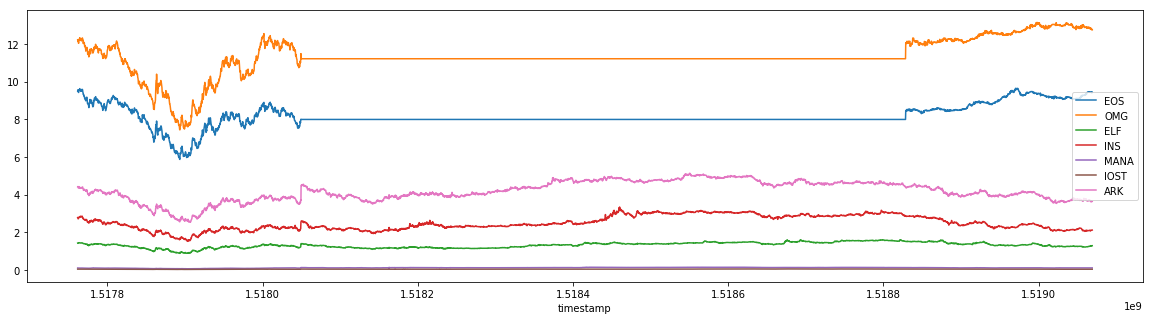

In [3]:
m.plot(x='timestamp', figsize=(20, 5))

## Denotes:

\begin{gather*}
\mathbb{P} : Price\\
\\action_{t}: Any\ actions\ that\ happened\ on\ time\ scale\ t.
\end{gather*}

### Inference

* Step 0: Create Components

In [4]:
tokens = [t for t in market_prices.columns if t != 'timestamp']
[Component(t) for t in tokens] 

[10000 EOS => 0 NTL,
 10000 OMG => 0 NTL,
 10000 ELF => 0 NTL,
 10000 INS => 0 NTL,
 10000 MANA => 0 NTL,
 10000 IOST => 0 NTL,
 10000 ARK => 0 NTL]

* Step I: Warmup With inital auction

\begin{gather*}
\mathbb{P}_{auction_t} = \frac{\mathbb{P}_{target}}{\mathbb{P}_{market}} \times 1000 \\
t = Time_{current} - Time_{window}
\end{gather*}


In [5]:
def rational_warmup(timestamp, market_price, sender, inital_price):
    for c in NLT_components.values():
        res = c(timestamp).auction(sender, (float(inital_price) / float(market_price[c.token])) * 1000)
        print(res)

The market parice on $Round_0$ is :

In [6]:
mp = m.T[0].drop('timestamp')

In [7]:
start_time = m.T[0]['timestamp'] - Component.auction_window - 1
sender = 'satoshi'
inital_price = float(15)  # 15 USD

In [8]:
sender = 'satoshi'
inital_price = float(15)  # 15 USD

* before


In [9]:
NLT_components

{'ARK': 10000 ARK => 0 NTL,
 'ELF': 10000 ELF => 0 NTL,
 'EOS': 10000 EOS => 0 NTL,
 'INS': 10000 INS => 0 NTL,
 'IOST': 10000 IOST => 0 NTL,
 'MANA': 10000 MANA => 0 NTL,
 'OMG': 10000 OMG => 0 NTL}

* after

In [10]:
rational_warmup(start_time, mp, sender, inital_price)

True
True
True
True
True
True
True


### Back to now

In [11]:
[c(m.T[0].timestamp) for c in NLT_components.values()]


EOS:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 1000}
OMG:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 2000}
ELF:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 3000}
INS:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 4000}
MANA:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 5000}
IOST:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 6000}
ARK:: New cycle 1
Found last Winner
sent 1000 NTL to satoshi
Current balance {'satoshi': 7000}


[11576.685553246836 EOS => 7000 NTL,
 11227.449703202661 OMG => 7000 NTL,
 20528.45214171002 ELF => 7000 NTL,
 15398.104347696219 INS => 7000 NTL,
 158215.1926501074 MANA => 7000 NTL,
 375807.70951941406 IOST => 7000 NTL,
 13393.423350086348 ARK => 7000 NTL]

### Check the Price

### Price via highest components $P_h$.

\begin{gather*}
\frac{Highest(Price_{components}) \times min_{bid}(Highest(Price_{components}))}{1000} \ for\ each\ components
\end{gather*}

### Price via average auction bid $P_a$.

\begin{gather*}
\frac{\sum{component_{highest\ bid}\times component_{price}}}{NLT_{amount\ per\ round}}
\end{gather*}



In [12]:
from sim.utils import nlt_price as p_h, nlt_price_2 as p_a

In [13]:
p_h(m.T[0]) # p_h

15.000000000000002

In [14]:
p_a(m.T[0]) # p_a

15.0

### $Round_1$ Get worth to redeeming and auction (Should be None)

In [15]:
from sim.utils import get_worth_to_auction, get_worth_to_redeem

In [16]:
get_worth_to_auction(m.T[0].drop('timestamp'), p_a)

{}

In [17]:
get_worth_to_auction(m.T[0].drop('timestamp'), p_h)

{}

In [18]:
get_worth_to_redeem(m.T[0].drop('timestamp'), p_h)

{}

In [19]:
get_worth_to_redeem(m.T[0].drop('timestamp'), p_a)

{}

### $Round_2$ Get worth to redeeming and auction

In [20]:
m.T[1].drop('timestamp')

EOS      9.571649
OMG     12.150611
ELF      1.428336
INS      2.767728
MANA     0.100280
IOST     0.040984
ARK      4.418087
Name: 1, dtype: float64

In [21]:
get_worth_to_auction(m.T[1].drop('timestamp'), p_a)

{'INS': {'delta': 35.532311968079739,
  'min_bid': 5398.1043476962195,
  'price': 2.767728},
 'MANA': {'delta': 112.99734305587299,
  'min_bid': 148215.1926501074,
  'price': 0.10028},
 'OMG': {'delta': 61.752812210184857,
  'min_bid': 1227.4497032026618,
  'price': 12.150611150000003}}

In [22]:
get_worth_to_auction(m.T[1].drop('timestamp'), p_h)

{'ARK': {'delta': 99.041710386973136,
  'min_bid': 3393.423350086348,
  'price': 4.4180868},
 'ELF': {'delta': 53.313401933730347,
  'min_bid': 10528.452141710017,
  'price': 1.4283359999999998},
 'INS': {'delta': 150.99607017468406,
  'min_bid': 5398.1043476962195,
  'price': 2.767728},
 'IOST': {'delta': 99.217453271581689,
  'min_bid': 365807.70951941406,
  'price': 0.040984},
 'MANA': {'delta': 228.46110126247731,
  'min_bid': 148215.1926501074,
  'price': 0.10028},
 'OMG': {'delta': 177.21657041678918,
  'min_bid': 1227.4497032026618,
  'price': 12.150611150000003}}

In [23]:
get_worth_to_redeem(m.T[1].drop('timestamp'), p_a)

{'ARK': {'delta': 16.422047819631189,
  'min_bid': 3393.423350086348,
  'price': 4.4180868},
 'ELF': {'delta': 62.150356272873978,
  'min_bid': 10528.452141710017,
  'price': 1.4283359999999998},
 'EOS': {'delta': 115.46375820660433,
  'min_bid': 1576.685553246836,
  'price': 9.57164895},
 'IOST': {'delta': 16.246304935022636,
  'min_bid': 365807.70951941406,
  'price': 0.040984}}

In [24]:
get_worth_to_redeem(m.T[1].drop('timestamp'), p_h)

{}

### $Round_2$ Get quantity for redeeming and auction

\begin{gather*}
auction_{quantity}=Component_{minbid}\times \frac{V_component}{V_ntl}\\
redeeming_{quantity}=\sum^{P_{redeem}<P_{component}} 1000
\end{gather*}



In [25]:
from sim.utils import determin_auction_quantity, determin_redeem_quantity



In [26]:
determin_auction_quantity(m.T[1].drop('timestamp'), p_h)

{'ARK': 3415.840680227298,
 'ELF': 10565.777674311401,
 'INS': 5452.6603120737464,
 'IOST': 368228.59213876748,
 'MANA': 150493.42461323543,
 'OMG': 1242.0346955317752}

In [27]:
determin_auction_quantity(m.T[1].drop('timestamp'), p_a)

{'INS': 5410.9424271491425,
 'MANA': 149342.01098931636,
 'OMG': 1232.5319835462465}

In [28]:
determin_redeem_quantity(m.T[1].drop('timestamp'), p_h)

{'ARK': 1000,
 'ELF': 1000,
 'INS': 1000,
 'IOST': 1000,
 'MANA': 1000,
 'OMG': 1000}

In [29]:
determin_redeem_quantity(m.T[1].drop('timestamp'), p_a)

{'ARK': 1000,
 'ELF': 1000,
 'INS': 1000,
 'IOST': 1000,
 'MANA': 1000,
 'OMG': 1000}

### Stategey with $P_a$

In [30]:
plan_to_redeem = determin_redeem_quantity(m.T[1].drop('timestamp'), p_a)
plan_to_redeem

{'ARK': 1000,
 'ELF': 1000,
 'INS': 1000,
 'IOST': 1000,
 'MANA': 1000,
 'OMG': 1000}

In [31]:
plan_to_auction = determin_auction_quantity(m.T[1].drop('timestamp'), p_a)
plan_to_auction

{'INS': 5410.9424271491425,
 'MANA': 149342.01098931636,
 'OMG': 1232.5319835462465}

In [32]:
NLT_accounts

{'satoshi': 7000}

In [33]:
NLT_components['EOS'].minted

{0: {'bid': 1576.685553246836, 'sender': 'satoshi'}}

#### Redeem ARK



In [34]:
list(NLT_components['ARK'](m.T[1].timestamp).redeem('satoshi', 1000))

redeeming 1000 for ARK, reserve is 13393.423350086348


[3393.423350086348]

In [35]:
p_a(m.T[0]) # p_a

12.857774330708573

In [38]:
get_worth_to_redeem(m.T[1].drop('timestamp'), p_a)

{'ELF': {'delta': 2203.296188134058,
  'min_bid': 10528.452141710017,
  'price': 1.4283359999999998},
 'EOS': {'delta': 2256.6095900677883,
  'min_bid': 1576.685553246836,
  'price': 9.57164895},
 'INS': {'delta': 2105.6135198931042,
  'min_bid': 5398.1043476962195,
  'price': 2.767728},
 'IOST': {'delta': 2157.3921367962066,
  'min_bid': 365807.70951941406,
  'price': 0.040984},
 'MANA': {'delta': 2028.148488805311,
  'min_bid': 148215.1926501074,
  'price': 0.10028},
 'OMG': {'delta': 2079.3930196509991,
  'min_bid': 1227.4497032026618,
  'price': 12.150611150000003}}

In [34]:
from sim.utils import redeem_strategy as redeem, auction_strategy as auction

In [35]:
redeem(plan_to_redeem, 'satoshi', m.T[1].timestamp)

redeeming 1000 for OMG, reserve is 11227.449703202661
redeeming 1000 for ELF, reserve is 20528.45214171002
redeeming 1000 for INS, reserve is 15398.104347696219
redeeming 1000 for MANA, reserve is 158215.1926501074
redeeming 1000 for IOST, reserve is 375807.70951941406
redeeming 1000 for ARK, reserve is 13393.423350086348


{'redeemed ARK': [3393.423350086348],
 'redeemed ELF': [10528.452141710017],
 'redeemed INS': [5398.1043476962195],
 'redeemed IOST': [365807.70951941406],
 'redeemed MANA': [148215.1926501074],
 'redeemed OMG': [1227.4497032026618]}

In [36]:
auction(plan_to_auction, 'satoshi', m.T[1].timestamp)

{'auctioned ARK': True,
 'auctioned ELF': True,
 'auctioned INS': True,
 'auctioned IOST': True,
 'auctioned MANA': True,
 'auctioned OMG': True}

### $Round_3$

In [37]:
NLT_reserve

{'ARK': 10000.0,
 'ELF': 10000.000000000002,
 'EOS': 11576.685553246836,
 'INS': 10000.0,
 'IOST': 10000.0,
 'MANA': 10000.0,
 'OMG': 10000.0}

In [38]:
[t.min_bid for t in NLT_components.values()]

[1576.685553246836, 1, 1, 1, 1, 1, 1]

In [39]:
m.T[2].drop('timestamp')

EOS      9.503056
OMG     12.242008
ELF      1.422520
INS      2.715798
MANA     0.098882
IOST     0.040767
ARK      4.403600
Name: 2, dtype: float64

In [47]:
p_a(m.T[2]) # p_a

45.605140197042246

In [41]:
get_worth_to_auction(m.T[1].drop('timestamp'), p_a)

{'ARK': {'delta': 45691.04328751647, 'min_bid': 1, 'price': 4.4180868},
 'ELF': {'delta': 45694.033038316469,
  'min_bid': 1,
  'price': 1.4283359999999998},
 'EOS': {'delta': 30603.98075410122,
  'min_bid': 1576.685553246836,
  'price': 9.57164895},
 'INS': {'delta': 45692.693646316467, 'min_bid': 1, 'price': 2.767728},
 'IOST': {'delta': 45695.420390316467, 'min_bid': 1, 'price': 0.040984},
 'MANA': {'delta': 45695.361094316468, 'min_bid': 1, 'price': 0.10028},
 'OMG': {'delta': 45683.310763166468,
  'min_bid': 1,
  'price': 12.150611150000003}}

In [42]:
get_worth_to_redeem(m.T[1].drop('timestamp'), p_a)

{}

In [43]:
plan_to_redeem = determin_redeem_quantity(m.T[2].drop('timestamp'), p_a)
plan_to_redeem

{'ARK': 1000,
 'ELF': 1000,
 'INS': 1000,
 'IOST': 1000,
 'MANA': 1000,
 'OMG': 1000}

In [44]:
plan_to_auction = determin_auction_quantity(m.T[2].drop('timestamp'), p_a)
plan_to_auction

{'ARK': 10356.774519123823,
 'ELF': 32060.783044686112,
 'INS': 16793.255890541433,
 'IOST': 1118716.6849635155,
 'MANA': 461225.29994109849,
 'OMG': 3725.4584601164834}

In [45]:
redeem(plan_to_redeem, 'satoshi', m.T[2].timestamp)

redeeming 1000 for OMG, reserve is 10000.0
redeeming 1000 for ELF, reserve is 10000.000000000002


Exception: ('out of balance', 0)

In [46]:
auction(plan_to_auction, 'satoshi', m.T[2].timestamp)

{'auctioned ARK': False,
 'auctioned ELF': False,
 'auctioned INS': False,
 'auctioned IOST': False,
 'auctioned MANA': False,
 'auctioned OMG': True}